In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [175]:
# 维度3，100个样本
X = np.random.rand(100,3)*5
# 绘制样本图像
oriX = X

In [176]:
# 均值0,每行
xm = np.mean(X,axis=0)
xm = np.tile(xm,(X.shape[0],1))

oriX = X
X-=xm
XT=np.dot(X.T,X)
XT=XT/(X.shape[0]-1)

In [177]:
#计算协方差矩阵
conX= np.cov(XT)
conX.shape 
conX

array([[ 1.30216124, -0.50457714, -1.11571032],
       [-0.50457714,  0.84323858, -0.18650491],
       [-1.11571032, -0.18650491,  1.54719331]])

In [178]:
#求解协方差矩阵的特征值和特征向量,一列是一个特征向量 
feaValue, feaVector = np.linalg.eigh(conX)
# feaVector,feaValue,v=np.linalg.svd(conX)

#依照featValue进行从大到小排序
indx = np.argsort(-feaValue)
print(f'before sort:{feaVector}')
# 特征向量中的每列为一个基向量，必须转置，全部选出来组成新的坐标系
selVector = feaVector.T[indx]
print(f'sorted:{selVector}')
# 降维后的维度
k=2


# 新坐标系中投影
# finlX = X@selVector.T
finlX = np.dot(X, selVector.T)

before sort:[[ 0.6636558   0.30697094 -0.68215088]
 [ 0.51674531 -0.84749416  0.1213587 ]
 [ 0.54086529  0.43303867  0.72107021]]
sorted:[[-0.68215088  0.1213587   0.72107021]
 [ 0.30697094 -0.84749416  0.43303867]
 [ 0.6636558   0.51674531  0.54086529]]


In [165]:
indx

array([2, 1, 0], dtype=int64)

In [179]:

# 使用降维数据重建原数据
# reconX = (finlX @ np.linalg.inv(selVector)) + xm  
reconX = np.dot(finlX, np.linalg.inv(selVector))+xm
finlX =finlX[:,0:k]
reconX.shape

(100, 3)

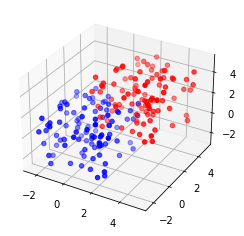

In [180]:

ax = plt.axes(projection='3d')
ax.scatter3D(oriX[:,0],oriX[:,1],oriX[:,2], c='b')
ax.scatter3D(reconX[:,0],reconX[:,1],reconX[:,2],c='r')
plt.show()

In [141]:
print(X.shape)
pcaObj = PCA(n_components=2,whiten= False)
X_new=pcaObj.fit_transform(X)
X_new.shape

(100, 3)


(100, 2)

(100, 3)


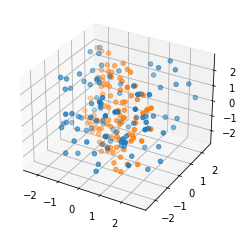

In [142]:
X_newRec= pcaObj.inverse_transform(X_new)
print(X_newRec.shape)
# plt.scatter(X_new[:,0],X_new[:,1])
ax=plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2])
ax.scatter3D(X_newRec[:,0],X_newRec[:,1],X_newRec[:,2])

In [143]:
np.sum(X_newRec - reconX)

-742.8900180536633

In [144]:
X_new-finlX

array([[ 0.54063122, -0.8121546 ],
       [-0.36629656,  0.93354715],
       [-1.28823786, -0.63444848],
       [ 0.75717121,  1.02422285],
       [-0.37821684, -1.25549178],
       [-0.82842456, -0.91534216],
       [ 1.79164015,  1.17096303],
       [ 0.13384364,  0.14165758],
       [ 1.07386747,  1.59177926],
       [ 0.61239835, -0.86471248],
       [ 1.67311577,  1.17252168],
       [-0.28070198, -1.52544885],
       [ 0.08584824,  1.65246406],
       [ 1.40335296,  1.41378094],
       [-1.03313318, -0.49633242],
       [ 0.74261064, -0.58503949],
       [ 0.64700076,  0.17682508],
       [-1.30066703,  0.08018962],
       [ 0.19996647,  0.37251245],
       [ 0.02560641,  0.05525576],
       [-0.45601693,  1.30792346],
       [-0.21401492, -1.92980435],
       [-0.3744056 ,  0.38501023],
       [ 1.88466759,  1.13314713],
       [ 1.25451713,  0.87110244],
       [ 0.33623355,  1.07606477],
       [-0.2645198 ,  1.11299817],
       [ 0.05574614, -0.59272568],
       [-0.36180623,